In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

nr=5

data = [None] * nr
for i in range(nr):
    with open('extr/training' + str(i+1) + '.pkl', 'rb') as f:
        data[i] = pickle.load(f)      

In [3]:
left_cumulative = np.zeros((nr, len(data[0])))
right_cumulative = np.zeros((nr, len(data[0])))
for i in range(nr):
    left_ids = set()
    right_ids = set()

    for j, episode in enumerate(data[i]):
        left_ids.update(set(episode['left_hand_touches']))
        right_ids.update(set(episode['right_hand_touches']))
        left_cumulative[i, j] = len(left_ids)
        right_cumulative[i, j] = len(right_ids)

In [ ]:
#avg
left_avg = np.mean(left_cumulative, axis=0)
right_avg = np.mean(right_cumulative, axis=0)

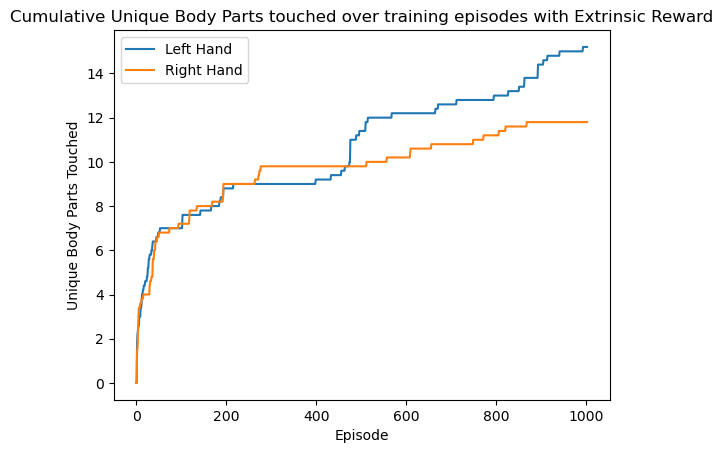

In [17]:
plt.plot(left_avg, label='Left Hand')
plt.plot(right_avg, label='Right Hand')
plt.xlabel('Episode')
plt.ylabel('Unique Body Parts Touched')
plt.title('Cumulative Unique Body Parts touched over training episodes with Extrinsic Reward')
plt.legend()
plt.show()

In [ ]:
#std
left_std = left_cumulative.std(axis=0)
right_std = right_cumulative.std(axis=0)

array([0.        , 0.        , 0.74833148, ..., 6.67532771, 6.67532771,
       6.67532771])

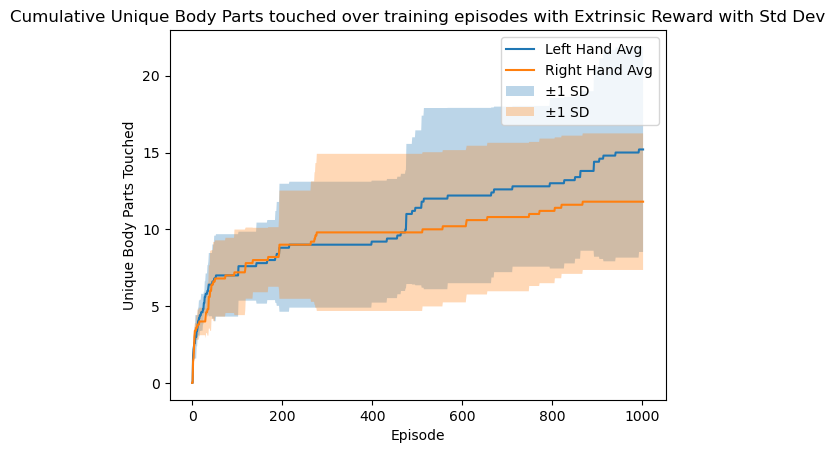

In [19]:
plt.plot(left_avg, label='Left Hand Avg')
plt.plot(right_avg, label='Right Hand Avg')
plt.fill_between(np.arange(len(left_avg)), left_avg - left_std, left_avg + left_std, alpha=0.3, label="±1 SD")
plt.fill_between(np.arange(len(right_avg)), right_avg - right_std, right_avg + right_std, alpha=0.3, label="±1 SD")
plt.xlabel('Episode')
plt.ylabel('Unique Body Parts Touched')
plt.title('Cumulative Unique Body Parts touched over training episodes with Extrinsic Reward with Std Dev')
plt.legend()
plt.show()